In [ ]:
#DASGAL 23 Орой бүрийн хувьд Betweenness centrality-ийг бодож гарга. (4 оноо)
bet = nx.betweenness_centrality(S)
ranks = [(k, v) for k, v in sorted(bet.items(), key=lambda item: -item[1])]
ranks[0:10]


[(4, 0.45),
 (5, 0.30000000000000004),
 (2, 0.15000000000000002),
 (3, 0.1),
 (1, 0.0),
 (6, 0.0)]

In [ ]:
import random

def vertex_copying_model(see2d_network, final_size, p):
    # initialize the network with the seed network
    network = seed_network.copy()
    while len(network) < final_size:
        vertex = random.choice(list(network.keys()))
        new_vertex = vertex + str(len(network))
        network[new_vertex] = []
        print('vert= ', vertex)
        for neighbor in network[vertex]:
            if random.random() < p:
                new_neighbor = random.choice(list(network.keys()))
                network[new_vertex].append(new_neighbor)
                network[new_neighbor].append(new_vertex)
            else:
                network[new_vertex].append(neighbor)
                network[neighbor].append(new_vertex)
    return network


In [ ]:

seed_network = {'A': ['B', 'C'], 'B': ['A'], 'C': ['A']}
final_size = 4
p = 0.5
network = vertex_copying_model(seed_network, final_size, p)
print(network)


vert=  B
{'A': ['B', 'C'], 'B': ['A'], 'C': ['A'], 'B3': ['B3', 'B3']}


In [ ]:
#holme-kim model

In [ ]:
import random
import numpy as np
import networkx as nx

def holme_kim_network(n, m, p):
    G = nx.complete_graph(m + 1)
    for i in range(m + 1, n):
        G.add_node(i)
        degrees = dict(G.degree())
        total_weight = sum(degrees.values())
        for j in range(m):
            target_node = None
            while target_node is None:
                r = random.uniform(0, total_weight)
                for node, weight in degrees.items():
                    r -= weight
                    if r <= 0:
                        target_node = node
                        break
            G.add_edge(i, target_node)
            degrees[target_node] += 1
            total_weight += 2

        # rewire edges with probability p
        for j in range(m):
            if random.random() < p:
                # choose a random target node
                target_node = random.choice(list(G.nodes()))
                # choose an existing neighbor to rewire
                source_node = random.choice(list(G.neighbors(i)))
                source_neighbors = list(G.neighbors(target_node))
                while source_node in source_neighbors or source_node == target_node:
                    # avoid duplicate edges and self-loops
                    source_node = random.choice(list(G.neighbors(i)))
                # remove old edge and add new one
                G.remove_edge(i, source_node)
                G.add_edge(i, target_node)

    return G


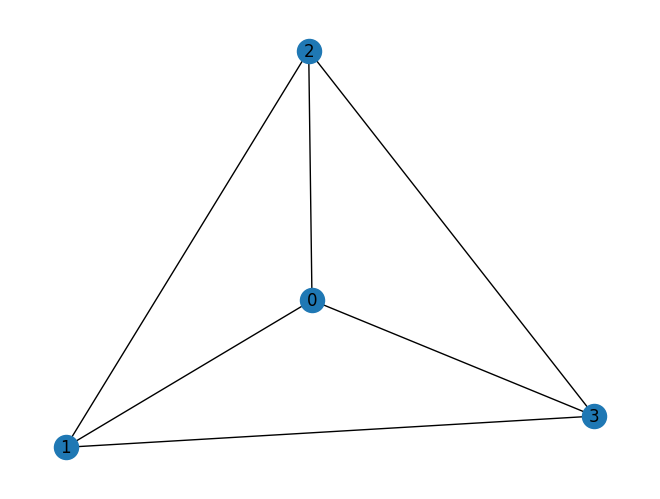

In [ ]:
# generate a Holme-Kim network with 100 nodes, each node connected to 3 others initially,
# and a rewiring probability of 0.1
G1 = holme_kim_network(n=10, m=3, p=0.1)

# visualize the resulting network



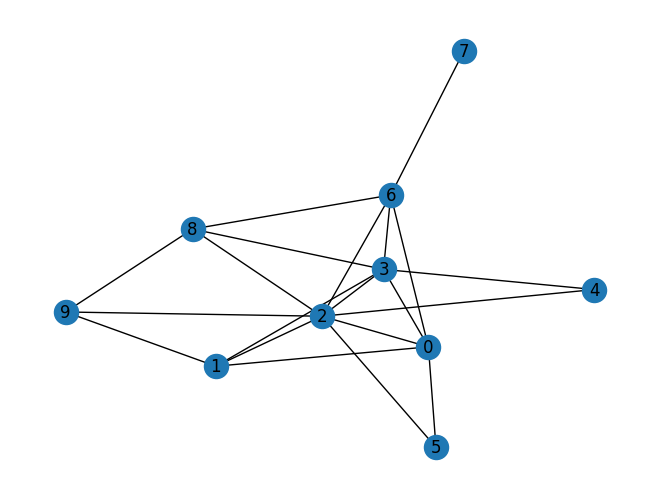

In [ ]:
nx.draw(G1, with_labels=True)